<a href="https://colab.research.google.com/github/Mrtushar1324/Student_Management_System/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.src.layers.pooling.max_pooling2d import MaxPooling2D
from keras.src.layers import Conv2D
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten , Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import os
import matplotlib.image as mpimg



In [ ]:
  import os
  os.environ['KAGGLE_USERNAME']='tusharsinghbhati'
  os.environ['KAGGLE_KEY']='KGAT_bb664f2f7630b8422804a44592691be6'


In [ ]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
 95% 745M/787M [00:11<00:00, 87.2MB/s]
100% 787M/787M [00:11<00:00, 71.6MB/s]


In [ ]:
from zipfile import ZipFile
data_path='kaggle-cat-vs-dog-dataset.zip'
with ZipFile(data_path,'r') as zip:
    zip.extractall()
    print('The data set has been extracted')

The data set has been extracted


In [ ]:
fig=plt.gcf()
fig.set_size_inches(16,16)
cat_dir=os.path.join('kagglecatsanddogs_3367a/PetImages/Cat')

<Figure size 1600x1600 with 0 Axes>

In [ ]:
dog_dir=os.path.join('kagglecatsanddogs_3367a/PetImages/Dog')

In [ ]:
cat_names=os.listdir(cat_dir)
dog_names=os.listdir(dog_dir)

In [ ]:
pic_index=210
cat_images=[os.path.join(cat_dir,fname)
for fname in cat_names[pic_index-8:pic_index]]
dog_images=[os.path.join(dog_dir,fname)
for fname in dog_names[pic_index-8:pic_index]]


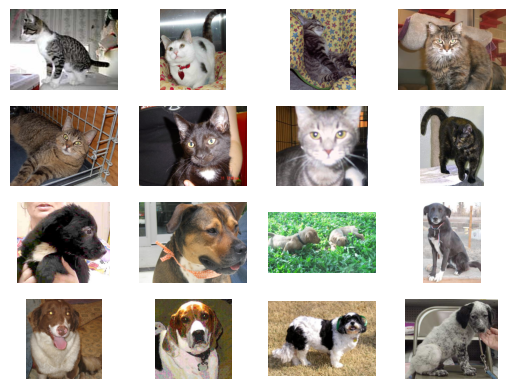

In [ ]:
for i ,img_path in enumerate(cat_images+dog_images):
  sp=plt.subplot(4,4,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import os
import tensorflow as tf
from pathlib import Path
data_dir='kagglecatsanddogs_3367a/PetImages'
count=0
print("cleaning process shuru ho raha hai.. thoda wait kar")
for folder in ['Cat','Dog']:
    path =os.path.join(data_dir, folder)
    for img_name in os.listdir(path):
        img_path=os.path.join(path, img_name)
        try:
            img= tf.io.read_file(img_path)
            img=tf.io.decode_image(img)
        except Exception as e:
            print("Deleting corrupt image:{img_path}")
            os.remove (img_path)
            count+=1
print("kaam khatam! Total {count} kharab images ko nikal dia gya hai")

cleaning process shuru ho raha hai.. thoda wait kar
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
Deleting corrupt image:{img_path}
kaam khatam! Total {count} kharab images ko nikal dia gya hai


In [ ]:
base_dir='kagglecatsanddogs_3367a/PetImages'
train_datagen=image_dataset_from_directory(base_dir,
                                           image_size=(200,200),
                                           subset='training',
                                           seed=1,
                                           validation_split=0.1,
                                           batch_size=32)
test_datagen=image_dataset_from_directory(base_dir,
                                          image_size=(200,200),
                                          subset='validation',
                                          seed=1,
                                          validation_split=0.1,
                                          batch_size=32)

Found 24953 files belonging to 2 classes.
Using 22458 files for training.
Found 24953 files belonging to 2 classes.
Using 2495 files for validation.


In [ ]:
model=tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')

])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,165,185 (15.89 MB)

 Trainable params: 4,162,113 (15.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history= model.fit(train_datagen,
                epochs=20,
                validation_data=test_datagen)

Epoch 1/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.5501 - loss: 0.8254 - val_accuracy: 0.5447 - val_loss: 0.7429
Epoch 2/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6372 - loss: 0.6349 - val_accuracy: 0.7427 - val_loss: 0.5525
Epoch 3/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.7205 - loss: 0.5486 - val_accuracy: 0.7511 - val_loss: 0.5446
Epoch 4/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.7825 - loss: 0.4738 - val_accuracy: 0.8321 - val_loss: 0.3927
Epoch 5/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.8172 - loss: 0.4062 - val_accuracy: 0.8297 - val_loss: 0.3997
Epoch 6/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.8464 - loss: 0.3537 - val_accuracy: 0.8505 - val_loss: 0.3490
Epoch 7/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.8181 - loss: 0.4012 - val_accuracy: 0.8008 - val_loss: 0.4494
Epoch 8/20
702/702 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.8234 - loss: 0.4059 - 

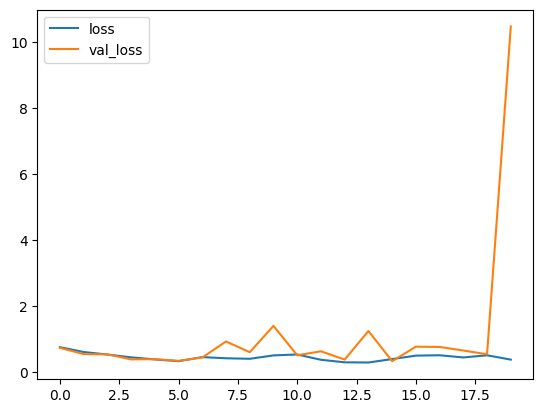

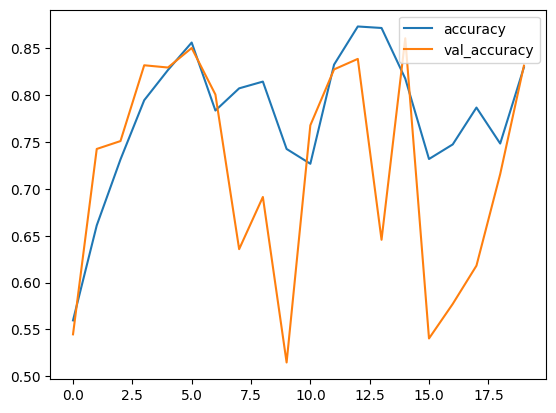

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

Saving 996.jpg to 996 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dog


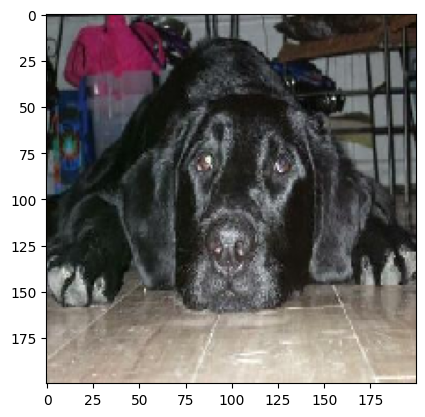

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    predict_image(fn)

In [ ]:
!git config --global user.name "Mrtushar1324"
!git config --global user.email "bhatikrishna447@gmail.com"

In [ ]:
!git clone https://github.com/Mrtushar1324/cat-vs-dog-classification-model.git

Cloning into 'cat-vs-dog-classification-model'...


In [ ]:
 %cd cat-vs-dog-classification-model

/content/cat-vs-dog-classification-model


In [ ]:
!ls /content

cat-vs-dog-classification-model  model	notebook  sample_data


In [ ]:
!mv /content/classification.ipynb /content/cat-vs-dog-classification-model/

mv: cannot stat '/content/classification.ipynb': No such file or directory
